# Segmenting and Clustering Similar Towns in Massachusetts Based on Venues

Import the necessary libraries

In [2]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


! pip install folium==0.5.0
import folium # plotting library

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import matplotlib.pyplot as plt  

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 79 kB 8.5 MB/s  eta 0:00:01
  Created wheel for folium: file

In [3]:
url_towns='https://en.wikipedia.org/wiki/List_of_Massachusetts_locations_by_per_capita_income'
list_towns=pd.read_html(url_towns)[2]
list_towns

,Rank,Municipality,Type,County,Per capitaincome,Medianhouseholdincome,Medianfamilyincome,Population,Number ofhouseholds
0,1.0,Weston,Town,Middlesex,"$105,217","$192,563","$250,000+",11538,3769
1,2.0,Dover,Town,Norfolk,"$89,476","$187,829","$193,750",5677,1891
2,3.0,Lexington,Town,Middlesex,"$82,550","$172,750","$177,845",31886,11541
3,4.0,Carlisle,Town,Middlesex,"$77,585","$160,034","$175,833",4918,1745
4,5.0,Sherborn,Town,Middlesex,"$73,420","$223,444","$164,063",4169,1427
...,...,...,...,...,...,...,...,...,...
348,347.0,Chelsea,City,Suffolk,"$20,617","$47,291","$48,849",36222,11550
349,348.0,Holyoke,City,Hampden,"$19,968","$31,628","$37,299",40029,15846
350,349.0,Amherst,Town,Hampshire,"$19,796","$53,191","$96,733",38651,8583
351,350.0,Springfield,City,Hampden,"$18,133","$34,311","$39,535",153428,55894


In [4]:
df = list_towns.dropna() #note two rows are removed
df

,Rank,Municipality,Type,County,Per capitaincome,Medianhouseholdincome,Medianfamilyincome,Population,Number ofhouseholds
0,1.0,Weston,Town,Middlesex,"$105,217","$192,563","$250,000+",11538,3769
1,2.0,Dover,Town,Norfolk,"$89,476","$187,829","$193,750",5677,1891
2,3.0,Lexington,Town,Middlesex,"$82,550","$172,750","$177,845",31886,11541
3,4.0,Carlisle,Town,Middlesex,"$77,585","$160,034","$175,833",4918,1745
4,5.0,Sherborn,Town,Middlesex,"$73,420","$223,444","$164,063",4169,1427
...,...,...,...,...,...,...,...,...,...
348,347.0,Chelsea,City,Suffolk,"$20,617","$47,291","$48,849",36222,11550
349,348.0,Holyoke,City,Hampden,"$19,968","$31,628","$37,299",40029,15846
350,349.0,Amherst,Town,Hampshire,"$19,796","$53,191","$96,733",38651,8583
351,350.0,Springfield,City,Hampden,"$18,133","$34,311","$39,535",153428,55894


Create a dataframe with only the needed column of Municipality.

In [5]:
df = df.drop(['Rank','Type','County','Per capitaincome','Medianhouseholdincome','Medianfamilyincome','Population','Number ofhouseholds'],axis=1)
df.columns = ["Neighborhood"]
df

,Neighborhood
0,Weston
1,Dover
2,Lexington
3,Carlisle
4,Sherborn
...,...
348,Chelsea
349,Holyoke
350,Amherst
351,Springfield


Create a new dataframe consisting of Towns.

In [6]:
df.shape

(351, 1)

Find the latitude and longitude coordinates for each town.

In [7]:
geolocator = Nominatim(user_agent="my_user_agent")

list_latitude = []
list_longitude = []

for town in df["Neighborhood"]:
    town = town
    state = "Massachusetts"
    loc = geolocator.geocode(town+','+ state)
    list_latitude.append(loc.latitude)
    list_longitude.append(loc.longitude)

Add the latitude and longitude to the dataframe.

In [8]:
df['Latitude']=list_latitude
df['Longitude']=list_longitude
df

,Neighborhood,Latitude,Longitude
0,Weston,42.366763,-71.303113
1,Dover,42.245931,-71.282834
2,Lexington,42.447317,-71.224500
3,Carlisle,42.529260,-71.349505
4,Sherborn,42.238986,-71.369781
...,...,...,...
348,Chelsea,42.391764,-71.032828
349,Holyoke,42.207143,-72.607650
350,Amherst,42.368566,-72.505714
351,Springfield,42.101876,-72.588673


## Clustering
Import libraries to be used in this section.

Add credentials to access Foursquare API.

In [9]:
CLIENT_ID = '5U55WV25CDHHNVKBDJBW1TD4NR44PXRH4ESANGDKTCU4THCA' #Foursquare ID
CLIENT_SECRET = 'PTQDS24PHK2HOTJHAVF2UE2PIG3VFENQSTNNJ1OTGTNIHYAX' #Foursquare Secret
ACCESS_TOKEN = 'OG1S1OK2WI2UWXMSXDOPIQVHMMCLZIWQFILGHDGVAN3HRGOD' #FourSquare Access Token
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 5U55WV25CDHHNVKBDJBW1TD4NR44PXRH4ESANGDKTCU4THCA
CLIENT_SECRET:PTQDS24PHK2HOTJHAVF2UE2PIG3VFENQSTNNJ1OTGTNIHYAX


Get the latitude and longitude of Massachusetts.

In [10]:
address = "Massachusetts"

geolocator = Nominatim(user_agent="massachusetts_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Massachusetts are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Massachusetts are 42.3788774, -72.032366.


In [11]:
df['State'] = 'Massachusetts'

Use the coordinates to create a map of Massachusetts with markers for each county.

In [12]:
map_MA = folium.Map(location=[latitude, longitude], zoom_start=8)
map_MA

for lat, lng, town, state in zip(
        df['Latitude'], 
        df['Longitude'],
        df['Neighborhood'],
        df['State']):
    label = '{}, {}'.format(town, state)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_MA)  

map_MA

Create the URL to access the venues within a 500 meter radius from the Parkwoods.

Create a function to explore venues in all the neighborhoods in Toronto.

In [13]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Get the neighborhoods from the function created above and create a dataframe with it.

In [14]:
town_venues = getNearbyVenues(names=df['Neighborhood'],latitudes=df['Latitude'],longitudes=df['Longitude'])

Weston
Dover
Lexington
Carlisle
Sherborn
Sudbury
Wellesley
Winchester
Manchester-by-the-Sea
Boxford
Wayland
Concord
Brookline
Norwell
Newton
Needham
Westwood
Southborough
Medfield
Lincoln
Boxborough
Cohasset
Hingham
Marblehead
Hopkinton
Belmont
Topsfield
Bolton
Alford
Duxbury
Longmeadow
Acton
Boylston
Sharon
Richmond
West Newbury
Stow
Andover
Harvard
Pelham
Tyringham
Holliston
Arlington
Westford
Mount Washington
Scituate
Chelmsford
Swampscott
Groton
Dunstable
Littleton
Cambridge
Nantucket
Reading
North Andover
Lynnfield
Wenham
Natick
Milton
Newburyport
Canton
Westborough
Ashland
Nahant
Marion
Provincetown
Chatham
North Reading
Wrentham
Watertown
Hamilton
Berlin
Chilmark
Northborough
Medway
Georgetown
Marshfield
Norfolk
Dedham
Ipswich
Princeton
Walpole
Foxborough
Upton
Bedford
Melrose
Sutton
Essex
Mansfield
Franklin
Newbury
Rockport
Mendon
Orleans
Hanover
Burlington
Hull
Tyngsborough
Holden
Sterling
Leverett
Egremont
Groveland
Wakefield
Shrewsbury
Grafton
Tolland
Tewksbury
Millis
Falmou

In [15]:
town_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Weston,42.366763,-71.303113,Theo's Pizzeria & Grille,42.367089,-71.301650,Pizza Place
1,Weston,42.366763,-71.303113,Dumpling Daughter,42.366820,-71.300544,Peking Duck Restaurant
2,Weston,42.366763,-71.303113,Brothers Marketplace,42.366831,-71.300548,Market
3,Weston,42.366763,-71.303113,Off Center,42.367016,-71.301094,Coffee Shop
4,Weston,42.366763,-71.303113,Walgreens,42.367541,-71.300605,Pharmacy


Find the number of venues returned by each neighborhood.

In [16]:
town_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Abington,9,9,9,9,9,9
Acton,4,4,4,4,4,4
Acushnet,9,9,9,9,9,9
Adams,13,13,13,13,13,13
Alford,1,1,1,1,1,1
...,...,...,...,...,...,...
Winthrop,15,15,15,15,15,15
Woburn,27,27,27,27,27,27
Worcester,32,32,32,32,32,32


Because there are some towns that Foursquare did not return results for, the towns with missing values are removed.

In [19]:
town_venues = town_venues.dropna()
town_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Weston,42.366763,-71.303113,Theo's Pizzeria & Grille,42.367089,-71.301650,Pizza Place
1,Weston,42.366763,-71.303113,Dumpling Daughter,42.366820,-71.300544,Peking Duck Restaurant
2,Weston,42.366763,-71.303113,Brothers Marketplace,42.366831,-71.300548,Market
3,Weston,42.366763,-71.303113,Off Center,42.367016,-71.301094,Coffee Shop
4,Weston,42.366763,-71.303113,Walgreens,42.367541,-71.300605,Pharmacy
...,...,...,...,...,...,...,...
3229,Lawrence,42.707035,-71.163114,Dunkin',42.707967,-71.159299,Donut Shop
3230,Lawrence,42.707035,-71.163114,Nick's Place,42.707464,-71.168167,Pizza Place
3231,Lawrence,42.707035,-71.163114,EbLens,42.705937,-71.165545,Shoe Store
3232,Lawrence,42.707035,-71.163114,Pollo Campero,42.707268,-71.168739,Fried Chicken Joint


In [20]:
print('There are {} uniques categories.'.format(len(town_venues['Venue Category'].unique())))

There are 310 uniques categories.


Create a dataframe with dummy variables denoting types of venues in each county.

In [21]:
# one hot encoding
town_onehot = pd.get_dummies(town_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
town_onehot['Neighborhood'] = town_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [town_onehot.columns[-1]] + list(town_onehot.columns[:-1])
town_onehot = town_onehot[fixed_columns]

town_onehot

,Yoga Studio,ATM,Accessories Store,African Restaurant,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Weight Loss Center,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3229,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3230,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3231,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3232,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
town_onehot.shape

(3234, 310)

Find the average of the frequency of occurrence in each category by grouping by the town.

In [23]:
town_grouped = town_onehot.groupby('Neighborhood').mean().reset_index()
town_grouped.head()

,Neighborhood,Yoga Studio,ATM,Accessories Store,African Restaurant,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Weight Loss Center,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,Abington,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0
1,Acton,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,Acushnet,0.0,0.0,0.0,0.0,0.222222,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,Adams,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,Alford,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
town_grouped.shape

(262, 310)

Find the top 5 most common venues.

In [25]:
num_top_venues = 5

for hood in town_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = town_grouped[town_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Abington----
                venue  freq
0  Chinese Restaurant  0.11
1         Video Store  0.11
2             Brewery  0.11
3      Sandwich Place  0.11
4         Coffee Shop  0.11


----Acton----
           venue  freq
0  Historic Site  0.25
1     Playground  0.25
2    Pizza Place  0.25
3          Trail  0.25
4  Moving Target  0.00


----Acushnet----
                 venue  freq
0  American Restaurant  0.22
1          Post Office  0.11
2           Steakhouse  0.11
3       Breakfast Spot  0.11
4           Donut Shop  0.11


----Adams----
                 venue  freq
0                  Bar  0.15
1          Pizza Place  0.15
2       Sandwich Place  0.08
3         Burger Joint  0.08
4  Martial Arts School  0.08


----Alford----
                     venue  freq
0              IT Services   1.0
1                Multiplex   0.0
2             Noodle House   0.0
3                Nightclub   0.0
4  New American Restaurant   0.0


----Amesbury----
                 venue  freq
0  American Res

                  venue  freq
0     Food & Drink Shop  0.12
1   American Restaurant  0.12
2      Botanical Garden  0.12
3  Gym / Fitness Center  0.12
4                  Park  0.12


----Cohasset----
            venue  freq
0            Café  0.12
1  Breakfast Spot  0.06
2      Bagel Shop  0.06
3     Post Office  0.06
4   Deli / Bodega  0.06


----Concord----
                 venue  freq
0  American Restaurant  0.14
1          Coffee Shop  0.09
2           Restaurant  0.05
3     Toy / Game Store  0.05
4                Plaza  0.05


----Conway----
            venue  freq
0     Post Office  0.25
1  Baseball Field  0.25
2  Farmers Market  0.25
3             Bar  0.25
4     Music Venue  0.00


----Cummington----
            venue  freq
0  Discount Store   0.5
1     Art Gallery   0.5
2     Yoga Studio   0.0
3     Music Store   0.0
4          Office   0.0


----Dalton----
                        venue  freq
0  Construction & Landscaping  0.33
1         American Restaurant  0.33
2             

                 venue  freq
0          Pizza Place  0.19
1       Ice Cream Shop  0.06
2  Arts & Crafts Store  0.06
3         Dessert Shop  0.06
4           Restaurant  0.06


----Hinsdale----
                     venue  freq
0              Golf Course   1.0
1              Yoga Studio   0.0
2                Multiplex   0.0
3                Nightclub   0.0
4  New American Restaurant   0.0


----Holbrook----
            venue  freq
0     Pizza Place   0.3
1  Breakfast Spot   0.2
2  Cosmetics Shop   0.1
3      Playground   0.1
4      Donut Shop   0.1


----Holden----
          venue  freq
0       Dog Run   1.0
1   Yoga Studio   0.0
2        Museum   0.0
3  Noodle House   0.0
4     Nightclub   0.0


----Holliston----
           venue  freq
0      BBQ Joint  0.09
1      Wine Shop  0.09
2      Gift Shop  0.09
3  Deli / Bodega  0.09
4    Pizza Place  0.09


----Holyoke----
              venue  freq
0       Pizza Place  0.20
1    Cosmetics Shop  0.07
2              Park  0.07
3  Storage Facili

                venue  freq
0         Pizza Place  0.12
1          Restaurant  0.08
2       Grocery Store  0.08
3  Mexican Restaurant  0.08
4  Athletics & Sports  0.04


----Millville----
               venue  freq
0  Convenience Store  0.25
1        Post Office  0.25
2        Pizza Place  0.25
3                Bar  0.25
4        Music Store  0.00


----Milton----
               venue  freq
0       Home Service   0.4
1  Convenience Store   0.2
2               Park   0.2
3      Grocery Store   0.2
4               Pool   0.0


----Nahant----
                venue  freq
0         Post Office  0.25
1       Event Service  0.25
2               Beach  0.25
3    Business Service  0.25
4  Miscellaneous Shop  0.00


----Natick----
                   venue  freq
0            Pizza Place  0.06
1     Italian Restaurant  0.06
2     Chinese Restaurant  0.03
3  Performing Arts Venue  0.03
4                   Park  0.03


----Needham----
                venue  freq
0  Italian Restaurant  0.10
1  Salon 

                venue  freq
0   Indian Restaurant  0.12
1                Café  0.12
2               Plaza  0.12
3  Chinese Restaurant  0.12
4       Deli / Bodega  0.12


----Sheffield----
                    venue  freq
0  Furniture / Home Store  0.33
1       Convenience Store  0.33
2               Bookstore  0.33
3               Multiplex  0.00
4            Noodle House  0.00


----Sherborn----
               venue  freq
0  Convenience Store   0.2
1         Donut Shop   0.2
2        Pizza Place   0.2
3   Business Service   0.2
4     Sandwich Place   0.2


----Shirley----
            venue  freq
0           Diner  0.17
1   Deli / Bodega  0.17
2      Donut Shop  0.17
3   Train Station  0.17
4  Hardware Store  0.17


----Somerset----
             venue  freq
0   History Museum  0.25
1             Park  0.25
2  Harbor / Marina  0.25
3   Baseball Field  0.25
4      Yoga Studio  0.00


----Somerville----
                  venue  freq
0              Bus Stop  0.12
1     Indian Restaurant  0.

            venue  freq
0  Discount Store  0.07
1      Donut Shop  0.07
2      Smoke Shop  0.07
3            Park  0.07
4             Bar  0.07


----Wilbraham----
          venue  freq
0        Lawyer  0.33
1   Pizza Place  0.33
2    Restaurant  0.33
3     Multiplex  0.00
4  Noodle House  0.00


----Williamsburg----
                    venue  freq
0                 Brewery   0.4
1       Food & Drink Shop   0.2
2  Furniture / Home Store   0.2
3             Post Office   0.2
4                   Plaza   0.0


----Williamstown----
          venue  freq
0         Motel   1.0
1   Yoga Studio   0.0
2        Museum   0.0
3        Office   0.0
4  Noodle House   0.0


----Wilmington----
                 venue  freq
0      Automotive Shop   0.4
1                  Gym   0.2
2               Bakery   0.2
3  Sporting Goods Shop   0.2
4                Plaza   0.0


----Winchester----
                     venue  freq
0           Cosmetics Shop  0.08
1              Coffee Shop  0.08
2       Italian Res

Sort the venues in descending occurence order.

In [26]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Find the 10 most common venues for each town.

In [27]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = town_grouped['Neighborhood']

for ind in np.arange(town_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(town_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted = neighborhoods_venues_sorted.dropna()
neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abington,Convenience Store,Pizza Place,Brewery,American Restaurant,Video Store,Sandwich Place,Liquor Store,Coffee Shop,Chinese Restaurant,Event Service
1,Acton,Playground,Pizza Place,Historic Site,Trail,Women's Store,Event Space,Drugstore,Dry Cleaner,Eastern European Restaurant,Electronics Store
2,Acushnet,American Restaurant,Convenience Store,Diner,Steakhouse,Breakfast Spot,Donut Shop,Pizza Place,Post Office,Event Space,Dry Cleaner
3,Adams,Pizza Place,Bar,Tourist Information Center,Park,Chinese Restaurant,Sandwich Place,Burger Joint,Martial Arts School,Liquor Store,Construction & Landscaping
4,Alford,IT Services,Women's Store,Falafel Restaurant,Dry Cleaner,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space,Exhibit
...,...,...,...,...,...,...,...,...,...,...,...
257,Winthrop,Pizza Place,Deli / Bodega,Gymnastics Gym,Bank,Theater,Bagel Shop,BBQ Joint,Chinese Restaurant,Diner,Restaurant
258,Woburn,Pizza Place,Chinese Restaurant,South Indian Restaurant,Tapas Restaurant,Liquor Store,Bank,Bakery,Japanese Restaurant,Italian Restaurant,Bowling Alley
259,Worcester,Donut Shop,Café,Sandwich Place,Rock Club,Pizza Place,Park,Bistro,Gas Station,Food & Drink Shop,Speakeasy
260,Wrentham,Convenience Store,Bank,Gastropub,Donut Shop,Breakfast Spot,Fish Market,Fish & Chips Shop,Financial or Legal Service,Fast Food Restaurant,Farmers Market


Find the optimal number of clusters using the elbow method.

In [28]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 

town_grouped_clustering = town_grouped.drop('Neighborhood', 1)
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(town_grouped_clustering) 
    kmeanModel.fit(town_grouped_clustering)     
      
    distortions.append(sum(np.min(cdist(town_grouped_clustering, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / town_grouped_clustering.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(town_grouped_clustering, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / town_grouped_clustering.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

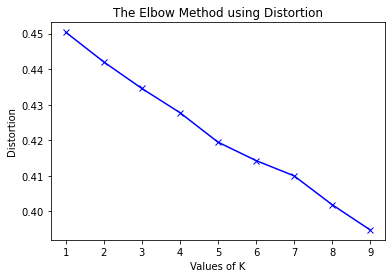

In [29]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

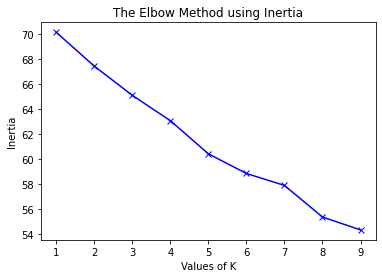

In [30]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

Run k-means to cluster the neighborhood into 6 clusters.

In [31]:
# set number of clusters
kclusters = 6

town_grouped_clustering = town_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(town_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([5, 5, 5, 5, 3, 5, 5, 5, 5, 4], dtype=int32)

Create a dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [32]:
df_town = df[['Neighborhood','Latitude','Longitude']]
df_town

,Neighborhood,Latitude,Longitude
0,Weston,42.366763,-71.303113
1,Dover,42.245931,-71.282834
2,Lexington,42.447317,-71.224500
3,Carlisle,42.529260,-71.349505
4,Sherborn,42.238986,-71.369781
...,...,...,...
348,Chelsea,42.391764,-71.032828
349,Holyoke,42.207143,-72.607650
350,Amherst,42.368566,-72.505714
351,Springfield,42.101876,-72.588673


In [33]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
df_MA = df_town
df_MA.columns = ['Neighborhood','Latitude','Longitude']

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
df_MA = df_MA.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

df_MA

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Weston,42.366763,-71.303113,5.0,Pizza Place,Pharmacy,Coffee Shop,Diner,Peking Duck Restaurant,Market,Women's Store,Event Space,Dry Cleaner,Eastern European Restaurant
1,Dover,42.245931,-71.282834,5.0,Post Office,Donut Shop,Grocery Store,Deli / Bodega,Dry Cleaner,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space
2,Lexington,42.447317,-71.224500,5.0,Italian Restaurant,Ice Cream Shop,Bank,Bakery,Coffee Shop,History Museum,Women's Store,Pizza Place,Shop & Service,Shoe Store
3,Carlisle,42.529260,-71.349505,0.0,Post Office,Sandwich Place,Park,Women's Store,Event Service,Donut Shop,Drugstore,Dry Cleaner,Eastern European Restaurant,Electronics Store
4,Sherborn,42.238986,-71.369781,2.0,Convenience Store,Pizza Place,Business Service,Sandwich Place,Donut Shop,Women's Store,Event Service,Dry Cleaner,Eastern European Restaurant,Electronics Store
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,Chelsea,42.391764,-71.032828,5.0,Pharmacy,Plaza,Arts & Crafts Store,Fast Food Restaurant,Liquor Store,Electronics Store,Donut Shop,Discount Store,Bank,Bagel Shop
349,Holyoke,42.207143,-72.607650,5.0,Pizza Place,Spanish Restaurant,Art Gallery,Bar,Café,Bakery,Storage Facility,Trail,Science Museum,Park
350,Amherst,42.368566,-72.505714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
351,Springfield,42.101876,-72.588673,5.0,American Restaurant,Hockey Arena,Café,Hotel,Shipping Store,Middle Eastern Restaurant,Donut Shop,Pizza Place,Coffee Shop,Sculpture Garden


In [34]:
df_MA = df_MA.dropna()
df_MA

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Weston,42.366763,-71.303113,5.0,Pizza Place,Pharmacy,Coffee Shop,Diner,Peking Duck Restaurant,Market,Women's Store,Event Space,Dry Cleaner,Eastern European Restaurant
1,Dover,42.245931,-71.282834,5.0,Post Office,Donut Shop,Grocery Store,Deli / Bodega,Dry Cleaner,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space
2,Lexington,42.447317,-71.224500,5.0,Italian Restaurant,Ice Cream Shop,Bank,Bakery,Coffee Shop,History Museum,Women's Store,Pizza Place,Shop & Service,Shoe Store
3,Carlisle,42.529260,-71.349505,0.0,Post Office,Sandwich Place,Park,Women's Store,Event Service,Donut Shop,Drugstore,Dry Cleaner,Eastern European Restaurant,Electronics Store
4,Sherborn,42.238986,-71.369781,2.0,Convenience Store,Pizza Place,Business Service,Sandwich Place,Donut Shop,Women's Store,Event Service,Dry Cleaner,Eastern European Restaurant,Electronics Store
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,New Bedford,41.636215,-70.934205,5.0,Fast Food Restaurant,Breakfast Spot,American Restaurant,Art Gallery,Farm,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space
348,Chelsea,42.391764,-71.032828,5.0,Pharmacy,Plaza,Arts & Crafts Store,Fast Food Restaurant,Liquor Store,Electronics Store,Donut Shop,Discount Store,Bank,Bagel Shop
349,Holyoke,42.207143,-72.607650,5.0,Pizza Place,Spanish Restaurant,Art Gallery,Bar,Café,Bakery,Storage Facility,Trail,Science Museum,Park
351,Springfield,42.101876,-72.588673,5.0,American Restaurant,Hockey Arena,Café,Hotel,Shipping Store,Middle Eastern Restaurant,Donut Shop,Pizza Place,Coffee Shop,Sculpture Garden


Convert column 'Cluster Lables' to an integer type to be used to make a map.

In [35]:
df_map_MA = df_MA
df_map_MA['Cluster Labels'] = df_map_MA['Cluster Labels'].fillna(0.0).astype(int)
df_map_MA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262 entries, 0 to 352
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Neighborhood            262 non-null    object 
 1   Latitude                262 non-null    float64
 2   Longitude               262 non-null    float64
 3   Cluster Labels          262 non-null    int64  
 4   1st Most Common Venue   262 non-null    object 
 5   2nd Most Common Venue   262 non-null    object 
 6   3rd Most Common Venue   262 non-null    object 
 7   4th Most Common Venue   262 non-null    object 
 8   5th Most Common Venue   262 non-null    object 
 9   6th Most Common Venue   262 non-null    object 
 10  7th Most Common Venue   262 non-null    object 
 11  8th Most Common Venue   262 non-null    object 
 12  9th Most Common Venue   262 non-null    object 
 13  10th Most Common Venue  262 non-null    object 
dtypes: float64(2), int64(1), object(11)
memory

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


Create a map of the clusters. 

In [36]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=8)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_MA['Latitude'], df_MA['Longitude'], df_MA['Neighborhood'], df_MA['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Cluster 1
Examine cluster 1.

In [37]:
df_MA.loc[df_MA['Cluster Labels'] == 0, df_MA.columns[[0] + list(range(4, df_MA.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Carlisle,Post Office,Sandwich Place,Park,Women's Store,Event Service,Donut Shop,Drugstore,Dry Cleaner,Eastern European Restaurant,Electronics Store
27,Bolton,Park,Playground,Performing Arts Venue,Women's Store,Drugstore,Dry Cleaner,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service
36,Stow,Park,Weight Loss Center,Pizza Place,American Restaurant,Women's Store,Drugstore,Dry Cleaner,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant
53,Reading,Pool,Park,Playground,Brewery,Dry Cleaner,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space
54,North Andover,Playground,Basketball Court,Ice Cream Shop,American Restaurant,Tree,Park,Women's Store,Exhibit,Dry Cleaner,Eastern European Restaurant
90,Newbury,Butcher,Home Service,Park,Women's Store,Event Space,Dry Cleaner,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service
95,Burlington,Park,Pizza Place,Gas Station,Disc Golf,Baseball Field,Playground,Fish & Chips Shop,Event Service,Dry Cleaner,Eastern European Restaurant
110,New Ashford,American Restaurant,Women's Store,Falafel Restaurant,Dry Cleaner,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space,Exhibit
154,Mattapoisett,Seafood Restaurant,Market,Harbor / Marina,Bar,Park,Event Space,Donut Shop,Drugstore,Dry Cleaner,Eastern European Restaurant
159,Hampden,Post Office,Park,Italian Restaurant,Dog Run,Drugstore,Dry Cleaner,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service


### Cluster 2
Examine cluster 2.

In [38]:
df_MA.loc[df_MA['Cluster Labels'] == 1, df_MA.columns[[0] + list(range(4, df_MA.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
56,Wenham,Breakfast Spot,History Museum,Women's Store,Falafel Restaurant,Dry Cleaner,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space
120,Plympton,Post Office,Breakfast Spot,Falafel Restaurant,Dry Cleaner,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space,Exhibit
123,West Bridgewater,Breakfast Spot,Women's Store,Falafel Restaurant,Dry Cleaner,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space,Exhibit
289,Russell,Breakfast Spot,Women's Store,Falafel Restaurant,Dry Cleaner,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space,Exhibit


### Cluster 3
Examine cluster 3.

In [39]:
df_MA.loc[df_MA['Cluster Labels'] == 2, df_MA.columns[[0] + list(range(4, df_MA.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Sherborn,Convenience Store,Pizza Place,Business Service,Sandwich Place,Donut Shop,Women's Store,Event Service,Dry Cleaner,Eastern European Restaurant,Electronics Store
74,Medway,Convenience Store,Pizza Place,Business Service,Nightclub,Playground,Plaza,Event Service,Drugstore,Dry Cleaner,Eastern European Restaurant
117,Hopedale,Convenience Store,Antique Shop,Liquor Store,Falafel Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space,Exhibit
134,Rochester,Baseball Field,Convenience Store,American Restaurant,Falafel Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space,Exhibit
139,Pembroke,Convenience Store,Pharmacy,Donut Shop,Falafel Restaurant,Dry Cleaner,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space
146,Brimfield,Convenience Store,Pizza Place,Farmers Market,Flea Market,Fish Market,Fishing Spot,Fish & Chips Shop,Financial or Legal Service,Fast Food Restaurant,Fishing Store
148,Eastham,Convenience Store,Antique Shop,Grocery Store,Liquor Store,Park,Women's Store,Event Space,Dry Cleaner,Eastern European Restaurant,Electronics Store
187,Sheffield,Convenience Store,Bookstore,Furniture / Home Store,Women's Store,Falafel Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space
217,Hanson,Convenience Store,Ice Cream Shop,New American Restaurant,Exhibit,Dry Cleaner,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space
227,Avon,Convenience Store,American Restaurant,Lake,Pizza Place,Financial or Legal Service,Bar,Liquor Store,Event Space,Eastern European Restaurant,Electronics Store


### Cluster 4
Examine cluster 4.

In [40]:
df_MA.loc[df_MA['Cluster Labels'] == 3, df_MA.columns[[0] + list(range(4, df_MA.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Boxford,Shop & Service,Farm,Women's Store,Exhibit,Dry Cleaner,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space
10,Wayland,Home Service,Pharmacy,Salon / Barbershop,Chinese Restaurant,Thai Restaurant,Women's Store,Ethiopian Restaurant,Donut Shop,Drugstore,Dry Cleaner
14,Newton,Brewery,Women's Store,Falafel Restaurant,Dry Cleaner,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space,Exhibit
19,Lincoln,Museum,Farm,Women's Store,Exhibit,Dry Cleaner,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space
20,Boxborough,Bakery,Women's Store,Falafel Restaurant,Dry Cleaner,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space,Exhibit
28,Alford,IT Services,Women's Store,Falafel Restaurant,Dry Cleaner,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space,Exhibit
30,Longmeadow,Pub,Women's Store,Exhibit,Drugstore,Dry Cleaner,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space
35,West Newbury,Italian Restaurant,Baseball Field,Playground,Women's Store,Dry Cleaner,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space
43,Westford,Bakery,Home Service,History Museum,Farmers Market,Exhibit,Drugstore,Dry Cleaner,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant
45,Scituate,Intersection,Women's Store,Falafel Restaurant,Dry Cleaner,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space,Exhibit


### Cluster 5
Examine cluster 5.

In [41]:
df_MA.loc[df_MA['Cluster Labels'] == 4, df_MA.columns[[0] + list(range(4, df_MA.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
34,Richmond,Business Service,Women's Store,Exhibit,Dry Cleaner,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space,Falafel Restaurant
96,Hull,Scenic Lookout,Business Service,Women's Store,Donut Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space
156,Lunenburg,Scenic Lookout,Women's Store,Dog Run,Drugstore,Dry Cleaner,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space
201,Ashburnham,Business Service,Bed & Breakfast,Women's Store,Exhibit,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space,Falafel Restaurant
270,South Hadley,Business Service,Yoga Studio,Exhibit,Dry Cleaner,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space,Falafel Restaurant
297,Buckland,Business Service,Women's Store,Exhibit,Dry Cleaner,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space,Falafel Restaurant


### Cluster 6
Examine cluster 6.

In [42]:
df_MA.loc[df_MA['Cluster Labels'] == 5, df_MA.columns[[0] + list(range(4, df_MA.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Weston,Pizza Place,Pharmacy,Coffee Shop,Diner,Peking Duck Restaurant,Market,Women's Store,Event Space,Dry Cleaner,Eastern European Restaurant
1,Dover,Post Office,Donut Shop,Grocery Store,Deli / Bodega,Dry Cleaner,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space
2,Lexington,Italian Restaurant,Ice Cream Shop,Bank,Bakery,Coffee Shop,History Museum,Women's Store,Pizza Place,Shop & Service,Shoe Store
5,Sudbury,Yoga Studio,Italian Restaurant,Pizza Place,Donut Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space
6,Wellesley,Coffee Shop,Pizza Place,Italian Restaurant,Thai Restaurant,Clothing Store,Mediterranean Restaurant,Yoga Studio,Pet Store,Shopping Mall,Café
...,...,...,...,...,...,...,...,...,...,...,...
347,New Bedford,Fast Food Restaurant,Breakfast Spot,American Restaurant,Art Gallery,Farm,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space
348,Chelsea,Pharmacy,Plaza,Arts & Crafts Store,Fast Food Restaurant,Liquor Store,Electronics Store,Donut Shop,Discount Store,Bank,Bagel Shop
349,Holyoke,Pizza Place,Spanish Restaurant,Art Gallery,Bar,Café,Bakery,Storage Facility,Trail,Science Museum,Park
351,Springfield,American Restaurant,Hockey Arena,Café,Hotel,Shipping Store,Middle Eastern Restaurant,Donut Shop,Pizza Place,Coffee Shop,Sculpture Garden
